In [86]:
"""
This notebook generates ISM shuffle plots, but varying the number of shuffles.
This was used to generate plots to respond to a reviewer comment.
"""

'\nThis notebook generates ISM shuffle plots, but varying the number of shuffles.\nThis was used to generate plots to respond to a reviewer comment.\n'

In [87]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [91]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
# Download the main mutagenesis data dump
TAR = "mutagenesis.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -xvzf {SCRATCH}/{TAR} -C {SCRATCH}")
# Download the data dump for varying # shuffles
TAR = "mutagenesis_n_shuffles.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -xvzf {SCRATCH}/{TAR} -C {SCRATCH}")

wget https://zenodo.org/records/10597358/files/mutagenesis.tar.gz -P /Users/adamhe/github/scratch
tar -xvzf /Users/adamhe/github/scratch/mutagenesis.tar.gz -C /Users/adamhe/github/scratch
wget https://zenodo.org/records/10597358/files/mutagenesis_n_shuffles.tar.gz -P /Users/adamhe/github/scratch
tar -xvzf /Users/adamhe/github/scratch/mutagenesis_n_shuffles.tar.gz -C /Users/adamhe/github/scratch


In [130]:
# Load data

# Specify motif to plot
motif = "tata"
i=20
j=6

# Load ISM scores
ism_shuffle_scores = np.load(os.path.join(SCRATCH, f"mutagenesis_n_shuffles/{motif}_shuffle{i}_window{j}.npz"))
corr = ism_shuffle_scores["arr_0"]
log_quantity = 1.59687745 * ism_shuffle_scores["arr_1"] / np.log(10)

# Load TSS positions
pred = np.load(os.path.join(SCRATCH, f"mutagenesis/{motif}/{motif}_oriented_prediction.npz"))
pred_tss = np.argmax(np.array(pred["track"])[:, :500], axis=1)
center = pred_tss + 250 - 50

In [131]:
# Extract scores around TSS

corr_around_tss = np.array(
    [corr[i, center[i] - 200:center[i] + 200] for i in range(len(center))]
)
log_quantity_around_tss = np.array(
    [log_quantity[i, center[i] - 200:center[i] + 200] for i in range(len(center))]
)

In [132]:
# Coerce to shape required for seaborn lineplot

corr_2d = pd.DataFrame(
    {
        "pos": list(range(-200, 200)) * corr_around_tss.shape[0],
        "corr": corr_around_tss.reshape(corr_around_tss.shape[0] * corr_around_tss.shape[1],),
    }
)
log_quantity_2d = pd.DataFrame(
    {
        "pos": list(range(-200, 200)) * log_quantity_around_tss.shape[0],
        "quantity": log_quantity_around_tss.reshape(log_quantity_around_tss.shape[0] * log_quantity_around_tss.shape[1],),
    }
)

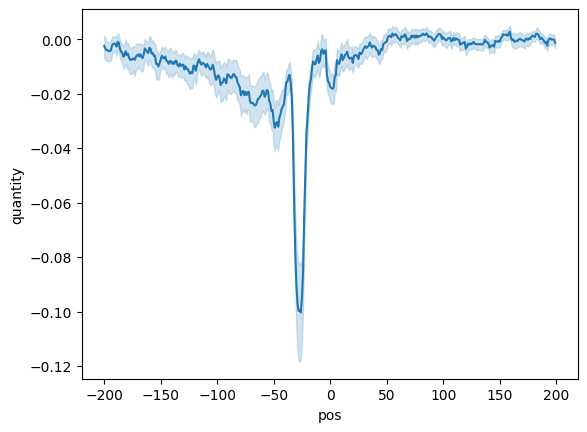

In [133]:
# Plot ISM shuffle scores (log fc)

ax = sns.lineplot(data=log_quantity_2d, x="pos", y="quantity")
plt.savefig(f"img/{motif}_ism_shuffle{i}_window{j}_logfc.pdf")

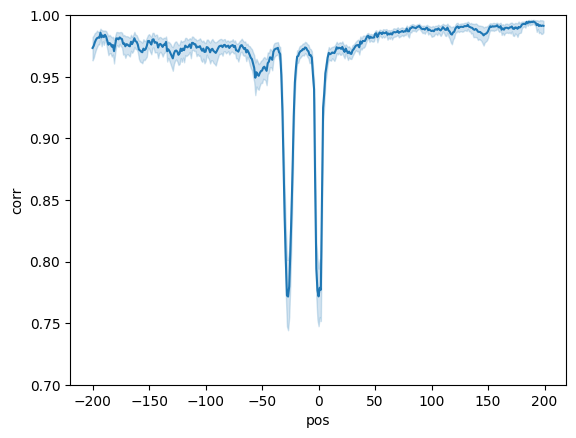

In [107]:
# Plot ISM shuffle scores (correlation)

ax = sns.lineplot(data=corr_2d, x="pos", y="corr")
plt.ylim(0.70, 1)
plt.savefig(f"img/{motif}_ism_shuffle{i}_window{j}_corr.pdf")